<a href="https://colab.research.google.com/github/khushbooekhande/DrugRecommendationSystem/blob/master/DrugLib_dataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
train_data = pd.read_csv('drive/My Drive/Colab Notebooks/DrugLib Dataset/Raw data/drugLibTrain_raw.tsv', encoding='utf-8', sep='\t')


In [5]:
train_data.head()

,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ..."
1,3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest..."
2,1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...
3,3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...
4,1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above


In [0]:
test_data = pd.read_csv('drive/My Drive/Colab Notebooks/DrugLib Dataset/Raw data/drugLibTest_raw.tsv', encoding='utf-8', sep='\t')

In [7]:
test_data.head()

,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,1366,biaxin,9,Considerably Effective,Mild Side Effects,sinus infection,The antibiotic may have destroyed bacteria cau...,"Some back pain, some nauseau.",Took the antibiotics for 14 days. Sinus infect...
1,3724,lamictal,9,Highly Effective,Mild Side Effects,bipolar disorder,Lamictal stabilized my serious mood swings. On...,"Drowsiness, a bit of mental numbness. If you t...",Severe mood swings between hypomania and depre...
2,3824,depakene,4,Moderately Effective,Severe Side Effects,bipolar disorder,Initial benefits were comparable to the brand ...,"Depakene has a very thin coating, which caused...",Depakote was prescribed to me by a Kaiser psyc...
3,969,sarafem,10,Highly Effective,No Side Effects,bi-polar / anxiety,It controlls my mood swings. It helps me think...,I didnt really notice any side effects.,This drug may not be for everyone but its wond...
4,696,accutane,10,Highly Effective,Mild Side Effects,nodular acne,Within one week of treatment superficial acne ...,Side effects included moderate to severe dry s...,Drug was taken in gelatin tablet at 0.5 mg per...


In [0]:
# Combining the training and testing datasets.
data = pd.concat([train_data, test_data])

In [9]:
data

,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ..."
1,3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest..."
2,1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...
3,3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...
4,1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above
...,...,...,...,...,...,...,...,...,...
1031,690,accutane,7,Considerably Effective,Severe Side Effects,acne vulgaris,Detoxing effect by pushing out the system thro...,"Hairloss, extreme dry skin, itchiness, raises ...",Treatment period is 3 months/12 weeks. Dosage ...
1032,1071,proair-hfa,10,Highly Effective,No Side Effects,asthma,"The albuterol relieved the constriction, irrit...",I have experienced no side effects.,I use the albuterol as needed because of aller...
1033,681,accutane,8,Considerably Effective,Moderate Side Effects,serve acne,Serve Acne has turned to middle,"Painfull muscles, problems with seeing at night","This drug is highly teratogenic ,females must ..."
1034,2709,divigel,10,Highly Effective,No Side Effects,menopause,"My overall mood, sense of well being, energy l...",No side effects of any kind were noted or appa...,Divigel is a topically applied Bio-Identical H...


In [10]:
#Checking the shapes of train_data, test_data and combined data.
print("Train data   : ", train_data.shape)
print("Test data    : ", test_data.shape)
print("Combined Data: ", data.shape)

Train data   :  (3107, 9)
Test data    :  (1036, 9)
Combined Data:  (4143, 9)


In [11]:
#Getting all information about the columns in the data.
data.info()
print('\n')
print("Count of null values column-wise:")
data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4143 entries, 0 to 1035
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         4143 non-null   int64 
 1   urlDrugName        4143 non-null   object
 2   rating             4143 non-null   int64 
 3   effectiveness      4143 non-null   object
 4   sideEffects        4143 non-null   object
 5   condition          4142 non-null   object
 6   benefitsReview     4143 non-null   object
 7   sideEffectsReview  4141 non-null   object
 8   commentsReview     4135 non-null   object
dtypes: int64(2), object(7)
memory usage: 323.7+ KB


Count of null values column-wise:


Unnamed: 0           0
urlDrugName          0
rating               0
effectiveness        0
sideEffects          0
condition            1
benefitsReview       0
sideEffectsReview    2
commentsReview       8
dtype: int64

In [0]:
#Dropping the column 'Unnamed:0' as it does not have relevant information.
data = data.drop(['Unnamed: 0'], axis = 1)

In [13]:
data

,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ..."
1,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest..."
2,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...
3,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...
4,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above
...,...,...,...,...,...,...,...,...
1031,accutane,7,Considerably Effective,Severe Side Effects,acne vulgaris,Detoxing effect by pushing out the system thro...,"Hairloss, extreme dry skin, itchiness, raises ...",Treatment period is 3 months/12 weeks. Dosage ...
1032,proair-hfa,10,Highly Effective,No Side Effects,asthma,"The albuterol relieved the constriction, irrit...",I have experienced no side effects.,I use the albuterol as needed because of aller...
1033,accutane,8,Considerably Effective,Moderate Side Effects,serve acne,Serve Acne has turned to middle,"Painfull muscles, problems with seeing at night","This drug is highly teratogenic ,females must ..."
1034,divigel,10,Highly Effective,No Side Effects,menopause,"My overall mood, sense of well being, energy l...",No side effects of any kind were noted or appa...,Divigel is a topically applied Bio-Identical H...


In [15]:
#Checking unique values of all columns.
#1. urlDrugName.
print("For the column: urlDrugName.\n")
print("Unique Values:",data['urlDrugName'].unique())
print("Count of unique values:",data['urlDrugName'].nunique())

For the column: urlDrugName.

Unique Values: ['enalapril' 'ortho-tri-cyclen' 'ponstel' 'prilosec' 'lyrica' 'propecia'
 'vyvanse' 'elavil' 'xanax' 'claritin' 'flagyl' 'dextroamphetamine'
 'sarafem' 'latisse' 'aldara' 'effexor-xr' 'neurontin' 'omnicef'
 'klonopin' 'dovonex' 'protopic' 'effexor' 'sotret' 'retin-a-micro'
 'lamotrigine' 'rebif' 'symbicort' 'lamictal' 'doxycycline' 'actonel'
 'provigil' 'ambien' 'wellbutrin' 'nortriptyline' 'imitrex' 'ativan'
 'prozac' 'topamax' 'levitra' 'oxycodone' 'oxycontin' 'vicodin' 'accutane'
 'zocor' 'minocycline' 'estrace' 'meridia' 'prevacid' 'cosopt' 'renova'
 'depakote' 'tekturna' 'zegerid' 'sular' 'crestor' 'metformin' 'celexa'
 'lexapro' 'naproxen' 'levoxyl' 'synthroid' 'spironolactone' 'oracea'
 'paxil' 'zantac' 'fosamax' 'tirosint' 'cymbalta' 'ambien-cr' 'angeliq'
 'prempro' 'wellbutrin-xl' 'biaxin' 'lipitor' 'tazorac' 'alendronate'
 'claripel-cream' 'valtrex' 'femring' 'soma' 'tylenol' 'ultram' 'chantix'
 'ziana' 'vivelle-dot' 'ultram-er' 'l

In [16]:
#2. rating.
print("For the column: rating.\n")
print("Unique Values:",data['rating'].unique())
print("Count of unique values:",data['rating'].nunique())

For the column: rating.

Unique Values: [ 4  1 10  3  2  9  7  8  6  5]
Count of unique values: 10


In [17]:
#3. effectiveness.
print("For the column: effectiveness.\n")
print("Unique Values:",data['effectiveness'].unique())
print("Count of unique values:",data['effectiveness'].nunique())

For the column: effectiveness.

Unique Values: ['Highly Effective' 'Marginally Effective' 'Ineffective'
 'Considerably Effective' 'Moderately Effective']
Count of unique values: 5


In [18]:
#4. sideEffects.
print("For the column: sideEffects.\n")
print("Unique Values:",data['sideEffects'].unique())
print("Count of unique values:",data['sideEffects'].nunique())

For the column: sideEffects.

Unique Values: ['Mild Side Effects' 'Severe Side Effects' 'No Side Effects'
 'Extremely Severe Side Effects' 'Moderate Side Effects']
Count of unique values: 5


In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [20]:
#5. condition.
print("For the column: condition.\n")
print("Unique Values:",data['condition'].unique())
print("Count of unique values:",data['condition'].nunique())

For the column: condition.

Unique Values: ['management of congestive heart failure' 'birth prevention'
 'menstrual cramps' ... 'sinus congestion' 'serve acne'
 'acne scarring & hyperpigmentation']
Count of unique values: 1807


In [21]:
#6. benefitsReview.
print("For the column: benefitsReview.\n")
print("Unique Values:",data['benefitsReview'].unique())
print("Count of unique values:",data['benefitsReview'].nunique())

For the column: benefitsReview.

Unique Values: ['slowed the progression of left ventricular dysfunction into overt heart failure \r\r\nalone or with other agents in the managment of hypertension \r\r\nmangagement of congestive heart failur'
 "Although this type of birth control has more cons than pros, it did help with my cramps. It's also effective with the prevention of pregnancy. (Along with use of condoms as well)"
 "I was used to having cramps so badly that they would leave me balled up in bed for at least 2 days.  The Ponstel doesn't take the pain away completely, but takes the edge off so much that normal activities were possible. Definitely a miracle medication!!"
 ... 'Serve Acne has turned to middle'
 'My overall mood, sense of well being, energy level was increased with better sleep pattern restored. I also noted improvement in my facial firmness and skin tone.'
 "Up until 2 years ago, it worked really well on any scarring I had but in the past 2 years it's been irritating 

In [22]:
#7. sideEffectsReview.
print("For the column: sideEffectsReview.\n")
print("Unique Values:",data['sideEffectsReview'].unique())
print("Count of unique values:",data['sideEffectsReview'].nunique())

For the column: sideEffectsReview.

Unique Values: ['cough, hypotension , proteinuria, impotence , renal failure , angina pectoris , tachycardia , eosinophilic pneumonitis, tastes disturbances , anusease anorecia , weakness fatigue insominca weakness'
 "Heavy Cycle, Cramps, Hot Flashes, Fatigue, Long Lasting Cycles. It's only been 5 1/2 months, but i'm concidering changing to a different bc. This is my first time using any kind of bc, unfortunately due to the constant hassel, i'm not happy with the results."
 'Heavier bleeding and clotting than normal.' ...
 'Painfull muscles, problems with seeing at night'
 'No side effects of any kind were noted or apparent from the use of this product. I have used bioidentical estrogen hormone Divigel for 2 years plus and plan to continue.'
 'Have stopped using it and have also learned that it should only be used 3 months at a time.']
Count of unique values: 3746


In [23]:
#8. commentsReview.
print("For the column: commentsReview.\n")
print("Unique Values:",data['commentsReview'].unique())
print("Count of unique values:",data['commentsReview'].nunique())

For the column: commentsReview.

Unique Values: ['monitor blood pressure , weight and asses for resolution of fluid'
 'I Hate This Birth Control, I Would Not Suggest This To Anyone.'
 'I took 2 pills at the onset of my menstrual cramps and then every 8-12 hours took 1 pill as needed for about 3-4 days until cramps were over. If cramps are bad, make sure to take every 8 hours on the dot because the medication stops working suddenly and unfortunately takes about an hour to an hour and a half to kick back in.. if cramps are only moderate, taking every 12 hours is okay.'
 ...
 "This drug is highly teratogenic ,females must take contraceptive tablets,so I did.\r\r\nI didn't experience any  serve side effects.It helped but the cost of therapy is horrible I resigned when I was told some of patient commited suicide maybe becouse of that drug."
 'Divigel is a topically applied Bio-Identical Hormone ( Estrogen) which I Highly Recommended. The product is applied topically at night to top of (leg)

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
#Re-arranging columns to set Rating as the first column.
data = data[['rating', 'urlDrugName', 'effectiveness', 'sideEffects', 'condition', 'benefitsReview', 'sideEffectsReview', 'commentsReview']]

In [26]:
data.head()

,rating,urlDrugName,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,4,enalapril,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ..."
1,1,ortho-tri-cyclen,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest..."
2,10,ponstel,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...
3,3,prilosec,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...
4,2,lyrica,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above


In [0]:
#dropping rows with null values.
data = data.dropna()

In [30]:
data

,rating,urlDrugName,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,4,enalapril,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ..."
1,1,ortho-tri-cyclen,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest..."
2,10,ponstel,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...
3,3,prilosec,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...
4,2,lyrica,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above
...,...,...,...,...,...,...,...,...
1031,7,accutane,Considerably Effective,Severe Side Effects,acne vulgaris,Detoxing effect by pushing out the system thro...,"Hairloss, extreme dry skin, itchiness, raises ...",Treatment period is 3 months/12 weeks. Dosage ...
1032,10,proair-hfa,Highly Effective,No Side Effects,asthma,"The albuterol relieved the constriction, irrit...",I have experienced no side effects.,I use the albuterol as needed because of aller...
1033,8,accutane,Considerably Effective,Moderate Side Effects,serve acne,Serve Acne has turned to middle,"Painfull muscles, problems with seeing at night","This drug is highly teratogenic ,females must ..."
1034,10,divigel,Highly Effective,No Side Effects,menopause,"My overall mood, sense of well being, energy l...",No side effects of any kind were noted or appa...,Divigel is a topically applied Bio-Identical H...


In [31]:
#Sorting the data in ascending order based on rating column.
data.sort_values(by=['rating'])

,rating,urlDrugName,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
751,1,dispermox,Ineffective,Severe Side Effects,abcessed tooth,"Amoxicillin did little, if any, good for the i...",I had a severe allergic reaction in the form o...,"After I had the reaction to amoxicillin, I dis..."
2351,1,lexapro,Marginally Effective,Severe Side Effects,anxiety,"Initially, Lexapro helped alleviate some of th...","Although some stress was alleviated, I noticed...",I took approximately 5mg a day. I visited my d...
2564,1,zocor,Ineffective,Extremely Severe Side Effects,high colesterol,the treatment was to help lower my colesterol ...,"muscle pain, loss of mobility, depresion, head...","1 to be taken daily, i only took this medicati..."
412,1,ventolin-hfa,Ineffective,Mild Side Effects,asthma,None,"Increased difficulty breathing, strange taste.",I have a prescription for albuterol for sports...
972,1,neurontin,Ineffective,Severe Side Effects,genitofemoral nerve damage,No treatment benefits. the edema was so severe...,"whole body swelling (even my eyelids), palpita...",After a rectocele prolapse operation in June 2...
...,...,...,...,...,...,...,...,...
1123,10,paxil,Highly Effective,Mild Side Effects,depression and anxiety,Paxil quickly improved my depression and also ...,During the second week I experienced stomach p...,I went to the doctor due to problems associate...
2370,10,sanctura-xr,Considerably Effective,Mild Side Effects,overactive bladder,With OAB there was the urge to urinate frequen...,Dry mouth if I fast from food. If I eat norma...,Take one capsule in the morning before eating ...
1133,10,trazodone,Highly Effective,No Side Effects,insomnia,Trazodone allows me to fall asleep within ten ...,I have noticed no side effects. I have never n...,50 mg taken with water directly before bed put...
1958,10,topamax,Highly Effective,Mild Side Effects,migraine headaches,I was suffering from migraine headaches for mo...,Mild loss of appetite. Loss of interest in alc...,"For the past six years of treatment, via a neu..."


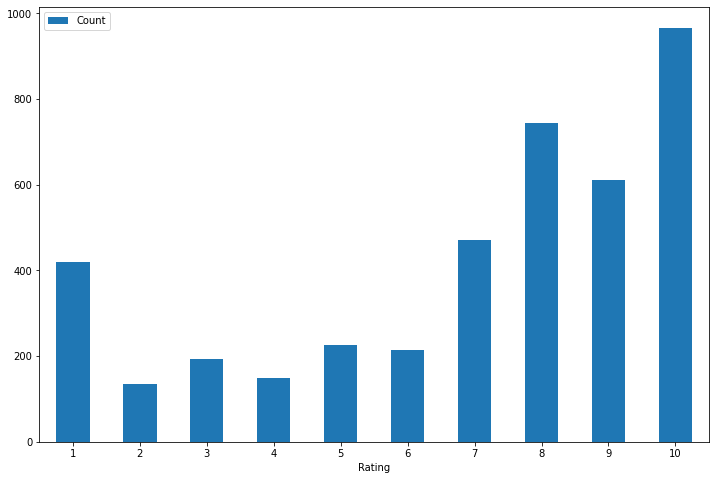

In [52]:
# Plotting the rating column unique value and their counts.
df = pd.DataFrame({'Rating':sorted(data['rating'].unique()), 'Count':data['rating'].value_counts().sort_index()})
df.plot.bar(x='Rating', y='Count', rot=0, figsize=(12,8))

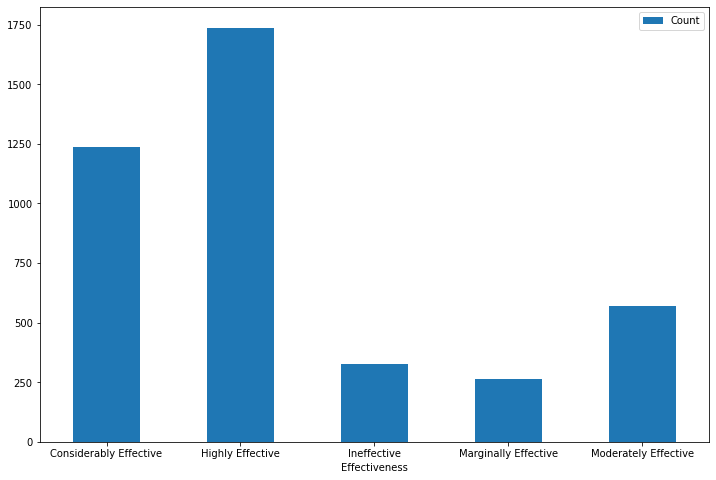

In [70]:
# Plotting the effective column unique value and their counts.
effectiveness = data['effectiveness'].unique()
effectiveness.sort()

effect = pd.DataFrame({'Effectiveness':effectiveness, 'Count':data['effectiveness'].value_counts().sort_index()})
effect.plot.bar(x='Effectiveness', y='Count', rot=0, figsize=(12,8))

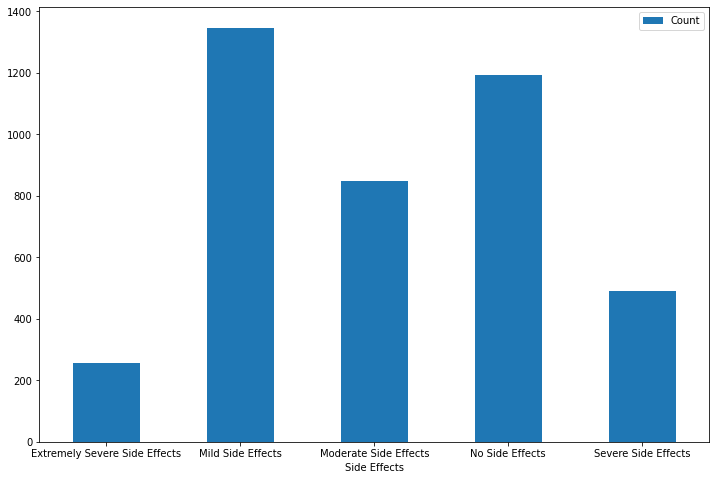

In [76]:
# Plotting the sideEffects column unique value and their counts.
sideEffects_sorted = data['sideEffects'].unique()
sideEffects_sorted.sort()

sideEff = pd.DataFrame({'Side Effects':sideEffects_sorted, 'Count':data['sideEffects'].value_counts().sort_index()})
sideEff.plot.bar(x='Side Effects', y='Count', rot=0, figsize=(12,8))

In [0]:
#Sorting data based on rating.
data = data.sort_values(by=['rating'])

In [0]:
#Exporting data to csv after preprocessing.
data.to_csv(r'drive/My Drive/Colab Notebooks/DrugLib Dataset/drugLib_processed.csv', index=False)